# 3. Curva de Lorenz y Coeficiente de Gini

En este cuaderno ofrece una introducción a medidas de desigualdad de la distribución de la riqueza, como la curva de Lorenz y el coeficiente de Gini.

Utilizaremos las siguientes librerías:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numba import jit, float64, prange
from numba.experimental import jitclass

## 3.1 La curva de Lorenz

Una medida gráfica popular de desigualdad es la curva de Lorenz.



### Cómo construir una curva de Lorenz

Imagina que analizamos la distribución de la renta de una población pequeña.

**Paso 1**: Ordena los datos
El primer paso es organizar los datos en orden ascendente. Para este ejemplo, supongamos que tenemos los siguientes valores de ingresos para cinco individuos de una población: 20$, 30$, 50$, 80$, 100$.

Ordenaremos estos valores de menor a mayor. Esto garantiza que los porcentajes acumulados que calculemos después tengan sentido.

**Paso 2**: Calcular porcentajes acumulados
Calculamos los porcentajes acumulados tanto para la población (eje x) como para la renta (eje y).

Para obtener el porcentaje de población acumulado, divide la posición de cada individuo en la lista ordenada por el número total de individuos. Por ejemplo, el primer individuo representa 1/5 (o 20%) de la población, el segundo representa 2/5 (40%), y así sucesivamente.

Para el porcentaje de ingresos acumulados, suma los ingresos progresivamente y divide cada total acumulado por el total de ingresos globales. En este ejemplo, la renta total es de $280\$$, por lo que la renta del primer individuo (20 $) representa 20/280 (o aproximadamente el 7,14%), y los dos primeros individuos juntos representan (20 + 30)/280 (aproximadamente el 17,86%).

**Paso 3**: Dibujar la distribución acumulativa

El eje de abscisas representa la parte acumulada de la población, y el eje de ordenadas representa la parte acumulada de la renta. Cada fila de la tabla corresponde a un punto del gráfico. Una vez trazados los puntos, conéctalos para formar la curva de Lorenz. A continuación, añade la línea de la igualdad perfecta.

**Paso 4**: Interpreta la curva de Lorenz
La curva de Lorenz resultante muestra la distribución real de la renta en esta población. Cuanto más se aleje la curva de la línea diagonal, mayor será la desigualdad. Como puedes ver en este ejemplo, la curva se curva notablemente porque el 20% de la población más pobre sólo posee el 7,14% de la renta


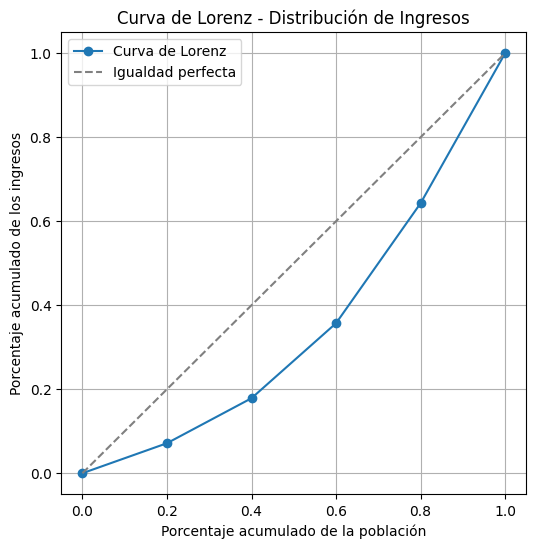

Coeficiente de Gini: 0.3000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Datos ordenados
ingresos = [20, 30, 50, 80, 100]
ingresos.sort()

df = pd.DataFrame({'Ingreso': ingresos})

# Paso 2: Porcentajes acumulados
n = len(df)
total_ingresos = df['Ingreso'].sum()

df['Poblacion_acum'] = [(i+1)/n for i in range(n)]
df['Ingreso_acum'] = df['Ingreso'].cumsum() / total_ingresos

# Paso 3: Dibujar la Curva de Lorenz
plt.figure(figsize=(6,6))
plt.plot([0] + df['Poblacion_acum'].tolist(),
         [0] + df['Ingreso_acum'].tolist(),
         marker='o', label='Curva de Lorenz')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Igualdad perfecta')
plt.title('Curva de Lorenz - Distribución de Ingresos')
plt.xlabel('Porcentaje acumulado de la población')
plt.ylabel('Porcentaje acumulado de los ingresos')
plt.legend()
plt.grid(True)
plt.show()

# Paso 4: Calcular el Coeficiente de Gini

# Añadimos el (0,0) y (1,1) para cerrar la curva
x = np.concatenate(([0], df['Poblacion_acum'].values))
y = np.concatenate(([0], df['Ingreso_acum'].values))

# Área bajo la curva de Lorenz (usamos la regla del trapecio)
area_bajo_lorenz = np.trapezoid(y, x)

# Coeficiente de Gini
gini = 1 - 2 * area_bajo_lorenz

print(f"Coeficiente de Gini: {gini:.4f}")


** Practica: **

Simulamos una muestra de tamaño 10000 que respresenta la riqueza de 10000 hogares, calcula y dibuja la curva de Lorenz, y calcula el coeficiente de Gini asociado que te ha salido.

In [ ]:
n = 100 # size of sample
#w = np.exp(np.random.randn(n)) # lognormal draws

w = np.append(np.random.poisson(lam=10, size=40),
              np.random.poisson(lam=100, size=10))
w = np.sort(w)

Podemos calcular y dibujar la curva de Lorenz como sigue:

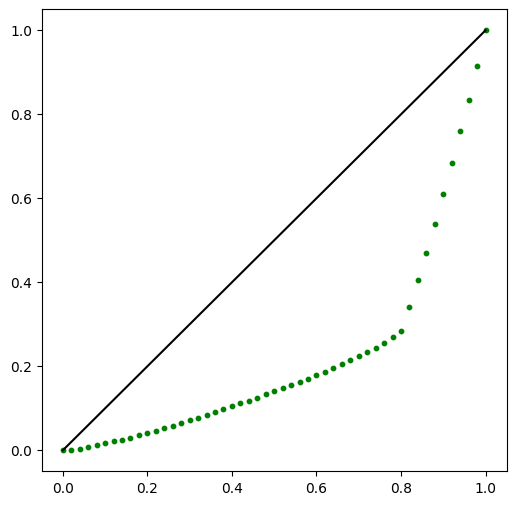

In [ ]:
w_lorenz = w.cumsum() / w.sum()
w_lorenz = np.insert(w_lorenz, 0, 0)
w_lorenz[0], w_lorenz[-1]

def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,
               marker='o', color='green', s=10)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

lorenz_curve(w)

## 3.2 El coeficiente de Gini

El coeficiente de Gini, junto con la curva de Lorenz, es una excelente manera de mostrar la desigualdad en una serie de valores. Sin embargo, no existen funciones de envoltura sencillas para el gráfico. Las he estado usando mucho últimamente y me gustaría explicar cómo las hago con Numpy y Matplotlib.

La fórmula proviene de la página de Wikipedia sobre el **índice de Gini**:

$$
Gini = \frac{2 \sum_{i=1}^n i \cdot y_i}{n \sum_{i=1}^n y_i} - \frac{n+1}{n}
$$

donde los valores $y_i$ están ordenados de manera creciente:

$$
y_i \leq y_{i+1}
$$

	​


In [ ]:
def gini(X):
    ## first sort
    sorted_X = X.copy()
    sorted_X.sort()
    n = X.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_X)])
    return coef_*weighted_sum/(sorted_X.sum()) - const_

print('El coeficiente de Gini es: ', gini(w))

El coeficiente de Gini es:  0.5862518089725037
